# Reinforcement Learning on 2048
Created 25.06.2025

In [1]:
import numpy as np
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipyevents import Event
import time
import gymnasium as gym

In [2]:
sys.path.insert(1, str(Path("..")))
import andreas2048
from andreas2048.game import *

In [3]:
from andreas2048 import gym2048
#env = gym.make("andreas_2048")
env = gym2048.Env2048()

In [4]:
import torch

In [5]:
raise RuntimeError("STOP")

RuntimeError: STOP

### 1 Interactive game

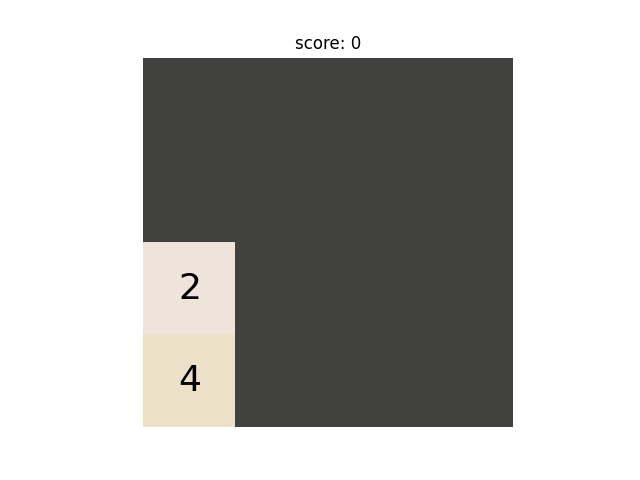

Test


In [ ]:
%matplotlib widget

game = andreas2048.Game(shape=(4,4))
plot_arrows = False
stdout = sys.stdout

def on_press(e):
    global plot_arrows, stdout
    if not game.alive:
        return
    match e.key:
        case "left":
            r = game.try_move(Action.LEFT)
        case "right":
            r = game.try_move(Action.RIGHT)
        case "up":
            r = game.try_move(Action.UP)
        case "down":
            r = game.try_move(Action.DOWN)
        case "r":
            plot_arrows = not plot_arrows
        case "z":
            game.undo()
        case _:
            r = False
    game.plot_on_axis(ax, plot_arrows=plot_arrows)
    fig.canvas.draw()

fig, ax = plt.subplots()
fig.canvas.mpl_connect('key_press_event', on_press)
game.plot_on_axis(ax)
plt.show()
print("Test")

### 2 Random game

Played 1000 games in 5.734 s


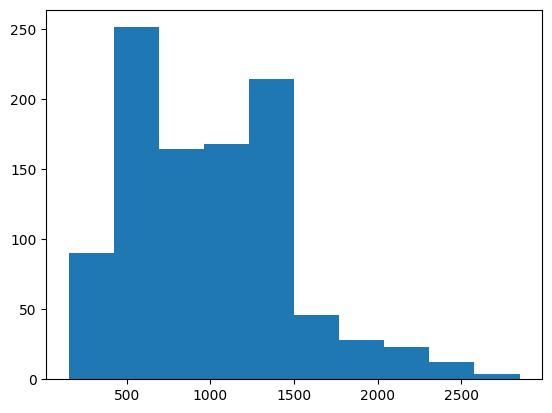

In [ ]:
n = 1000
score = []

t0 = time.perf_counter()
for i in range(n):
    game = Game()
    while game.alive:
        game.try_move(np.random.choice([Action.UP, Action.DOWN, Action.LEFT, Action.RIGHT]))
    score.append(game.score)
t1 = time.perf_counter()
print(f"Played {n} games in {(t1-t0):1.3f} s")

plt.hist(score)
plt.show()

<2048 Game (Ended): score 568; 76 moves lead to 64 as highest tile>


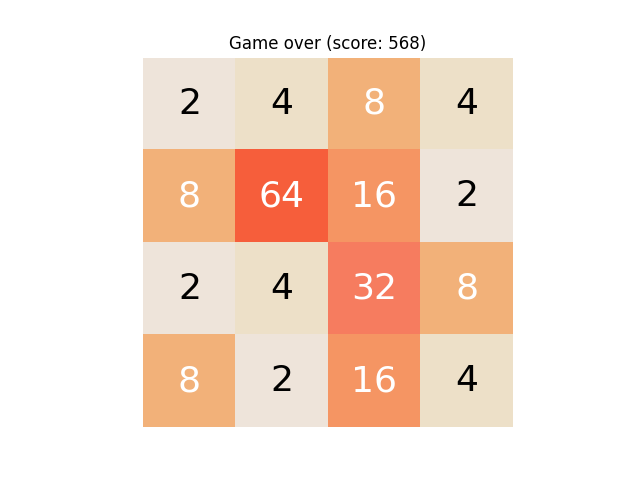

In [ ]:
game = Game()

while game.alive:
    game.try_move(np.random.choice([Action.UP, Action.DOWN, Action.LEFT, Action.RIGHT]))

print(game)
ax = plt.subplot()
game.plot_on_axis(ax)
plt.show()

### 3 Gymnasium

In [ ]:
from gymnasium.utils.env_checker import check_env

try:
    check_env(env)
    print("Environment passes all checks!")
except Exception as e:
    print(f"Environment has issues: {e}")

Environment passes all checks!


In [6]:
class Random_Policy:

    def __init__(self, env: gym.Env) -> None:
        self.env = env

    def get_action(self, game: Game) -> Action:
        return np.random.choice([Action.UP, Action.DOWN, Action.LEFT, Action.RIGHT])

In [ ]:
class DQN_Agent:

    def __init__(self, env: gym.Env) -> None:
        self.env = env

    def get_action(self, obs: np.ndarray) -> int:
        pass

    def build_model(self):
        model = torch.nn.Sequential()

In [8]:
agent = Random_Policy(env)
for episode in range(10):
    # Start a new hand
    obs, info = env.reset()
    done = False

    # Play one complete hand
    while not done:
        # Agent chooses action (initially random, gradually more intelligent)
        action = agent.get_action(obs)

        # Take action and observe result
        next_obs, reward, terminated, truncated, info = env.step(action)

        # Learn from this experience
        #agent.update(obs, action, reward, terminated, next_obs)

        # Move to next state
        done = terminated or truncated
        obs = next_obs
    print(info)

{'alive': False, 'score': 524, 'highest_tile': 64, 'move_count': 70}
{'alive': False, 'score': 400, 'highest_tile': 64, 'move_count': 57}
{'alive': False, 'score': 588, 'highest_tile': 64, 'move_count': 77}
{'alive': False, 'score': 852, 'highest_tile': 64, 'move_count': 99}
{'alive': False, 'score': 1268, 'highest_tile': 128, 'move_count': 123}
{'alive': False, 'score': 1412, 'highest_tile': 128, 'move_count': 141}
{'alive': False, 'score': 672, 'highest_tile': 64, 'move_count': 86}
{'alive': False, 'score': 1360, 'highest_tile': 128, 'move_count': 131}
{'alive': False, 'score': 1504, 'highest_tile': 128, 'move_count': 144}
{'alive': False, 'score': 1320, 'highest_tile': 128, 'move_count': 131}


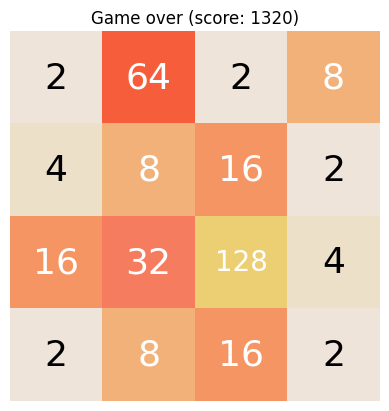

In [10]:
env.game.plot_on_axis(plt.gca())